In [1]:
import pandas as pd
import numpy as np
import math

cla=pd.read_csv('cla.gzip',compression='gzip') 
sna=pd.read_csv('sna_metrics.csv')

In [2]:
cla.shape

(455401, 90)

In [3]:
sna.shape

(136, 10)

In [4]:
sna.head()

,Id,Label,timeset,modularity_class,Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,pageranks
0,0,NaN,NaN,3,101,2,0.798817,0.874074,195.889144,0.006164
1,100,NaN,NaN,2,4,3,0.487365,0.501235,0.000000,0.001121
2,101,NaN,NaN,2,28,3,0.555556,0.602469,9.120506,0.001414
3,102,NaN,NaN,2,27,3,0.553279,0.598765,0.051610,0.001194
4,103,NaN,NaN,1,25,3,0.546559,0.590123,0.042335,0.001223


In [5]:
sna.drop(['Label','timeset'],axis=1,inplace=True)

In [6]:
sna=sna.round(2)

In [7]:
cla=cla.merge(sna,left_on='subcategory_1',right_on='Id',how='left').drop('Id',axis=1)

In [8]:
cla=cla.merge(sna,left_on='subcategory_2',right_on='Id',how='left',suffixes=('_1', '_2')).drop('Id',axis=1)

In [9]:
cla.columns

Index(['sa', 'is_donor', 'month_id_original', 'cp4', 'dsc_class_churn',
       'geom_distrito_dsc', 'geom_municipio_dsc', 'geom_freguesia_dsc',
       'geom_nuts_ii_dsc', 'geom_nuts_iii_dsc',
       ...
       'harmonicclosnesscentrality_1', 'betweenesscentrality_1', 'pageranks_1',
       'modularity_class_2', 'Degree_2', 'Eccentricity_2',
       'closnesscentrality_2', 'harmonicclosnesscentrality_2',
       'betweenesscentrality_2', 'pageranks_2'],
      dtype='object', length=104)

In [10]:
len(cla.columns)

104

In [11]:
sub=[col for col in cla.columns if "subcat" in col and "bin" not in col]

In [12]:
for col in sub:
    cla[col]=cla[col].astype(str)

In [13]:
big=[]
for var in cla.select_dtypes(include=['object']).columns:
    if len(cla[var].unique())>15:
        big.append(var)

In [14]:
big.append('cp4')

In [15]:
big.remove('sa')

In [16]:
big

['geom_distrito_dsc',
 'geom_municipio_dsc',
 'geom_freguesia_dsc',
 'geom_nuts_iii_dsc',
 'pack_dsc',
 'subcategory_1',
 'subcategory_2',
 'subcategory_3',
 'subcategory_4',
 'subcategory_5',
 'subcategory_6',
 'subcategory_7',
 'subcategory_8',
 'subcategory_9',
 'subcategory_10',
 'cp4']

In [17]:
cla.cp4=cla.cp4.astype(str)

In [18]:
for col in big:
    top=cla.loc[(cla.month_id_original!=202008),col].value_counts()[:5]
    print(col,'\n',top,'\n')

geom_distrito_dsc 
 LISBOA (DISTRITO)      114821
PORTO (DISTRITO)        71410
SETÃšBAL (DISTRITO)     56663
BRAGA (DISTRITO)        25334
FARO (DISTRITO)         15669
Name: geom_distrito_dsc, dtype: int64 

geom_municipio_dsc 
 LISBOA (MUNICIPIO)    28982
SINTRA                19279
VILA NOVA DE GAIA     14884
ALMADA                13461
CASCAIS               13359
Name: geom_municipio_dsc, dtype: int64 

geom_freguesia_dsc 
 SETÃšBAL (SÃƒO SEBASTIÃƒO)                                                          5021
UNIÃƒO DAS FREGUESIAS DE CASCAIS E ESTORIL                                          4101
UNIÃƒO DAS FREGUESIAS DE ALTO DO SEIXALINHO, SANTO ANDRÃ‰ E VERDERENA               3887
UNIÃƒO DAS FREGUESIAS DE OEIRAS E SÃƒO JULIÃƒO DA BARRA, PAÃ‡O DE ARCOS E CAXIAS    3762
UNIÃƒO DAS FREGUESIAS DE ALMADA, COVA DA PIEDADE, PRAGAL E CACILHAS                 3597
Name: geom_freguesia_dsc, dtype: int64 

geom_nuts_iii_dsc 
 GRANDE LISBOA             111054
GRANDE PORTO               6

In [19]:
for col in big:
    top=cla.loc[(cla.month_id_original!=202008),col].value_counts().index[:5]
    cla.loc[cla[col].isin(top),col+'_new']=cla.loc[cla[col].isin(top),col]
    cla.loc[~cla[col].isin(top),col+'_new']='Other'

In [20]:
cla.head()

,sa,is_donor,month_id_original,cp4,dsc_class_churn,geom_distrito_dsc,geom_municipio_dsc,geom_freguesia_dsc,geom_nuts_ii_dsc,geom_nuts_iii_dsc,...,subcategory_2_new,subcategory_3_new,subcategory_4_new,subcategory_5_new,subcategory_6_new,subcategory_7_new,subcategory_8_new,subcategory_9_new,subcategory_10_new,cp4_new
0,4329560142D21690C211BCA3EE65C83C,0.0,202005,2845.0,0.0,SETÃšBAL (DISTRITO),SEIXAL,AMORA,LISBOA (NUTS II),PENÃNSULA DE SETÃšBAL,...,126.0,Other,90.0,Other,Other,93.0,Other,96.0,Other,Other
1,E516D7AADFF328836280B1969577D80D,0.0,202005,2900.0,0.0,SETÃšBAL (DISTRITO),SETÃšBAL (MUNICIPIO),UNIÃƒO DAS FREGUESIAS DE SETÃšBAL (SÃƒO JULIÃƒ...,LISBOA (NUTS II),PENÃNSULA DE SETÃšBAL,...,86.0,Other,90.0,Other,96.0,93.0,Other,Other,Other,Other
2,1068EC724654A19CBF73771104F00C6B,0.0,202005,2820.0,0.0,SETÃšBAL (DISTRITO),ALMADA,UNIÃƒO DAS FREGUESIAS DE CHARNECA DE CAPARICA ...,LISBOA (NUTS II),PENÃNSULA DE SETÃšBAL,...,126.0,Other,Other,Other,Other,Other,Other,Other,Other,Other
3,92BC24B777B922C3A61517604AFB0040,0.0,202005,4910.0,0.0,VIANA DO CASTELO (DISTRITO),CAMINHA,VILA PRAIA DE Ã‚NCORA,NORTE,MINHO-LIMA,...,126.0,Other,86.0,Other,90.0,93.0,Other,Other,81.0,Other
4,01CEC8EC107C6A174ECDA938DD53FCE2,0.0,202005,4795.0,0.0,PORTO (DISTRITO),SANTO TIRSO,AVES,NORTE,AVE,...,126.0,78.0,Other,Other,81.0,93.0,Other,86.0,Other,Other


In [21]:
rem=big

In [22]:
rem.append('sa')

In [23]:
cla2=cla.copy()
cla.drop(rem,axis=1,inplace=True)

In [24]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
cla.head()

,is_donor,month_id_original,dsc_class_churn,geom_nuts_ii_dsc,after_due_days_qty_bin,typeh_card_qty,typei_card_qty,typea_card_qty,typeb_card_qty,typec_card_qty,typed_card_qty,typee_card_qty,typef_card_qty,typeg_card_qty,premium_qty,premium_flg,premium_a_qty,premium_b_qty,premium_d_qty,premium_a_amt_bin,subcategory_qtd_seconds_mon_1_bin,subcategory_qtd_seconds_mon_2_bin,subcategory_qtd_seconds_mon_5_bin,subcategory_qtd_seconds_mon_6_bin,subcategory_qtd_seconds_mon_8_bin,subcategory_qtd_seconds_mon_9_bin,subcategory_qtd_seconds_mon_10_bin,nr_devices,channel_diversity_sa_bin,nr_seconds_seen_0h2h_bin,nr_seconds_seen_3h5h_bin,nr_seconds_seen_18h20h_bin,nr_seconds_seen_21h23h_bin,segment,package_type,fiscal_num_bin,telephone_num,max_call_sent_dur_bin,max_call_rec_dur_bin,apple,rate_plan_A,rate_plan_C,rate_plan_F,min_call_sent_dur_bin,min_call_rec_dur_bin,nr_calls_sent_month_bin,mean_call_sent_dur_bin,nr_calls_sent_distinct_numbers_bin,nr_distinct_cells_sent_bin,nr_distinct_freguesia_sent_bin,nr_distinct_concelho_sent_bin,nr_calls_rec_month_bin,mean_call_rec_dur_bin,nr_calls_rec_distinct_numbers_bin,nr_distinct_cells_rec_bin,nr_distinct_freguesia_rec_bin,nr_distinct_concelho_rec_bin,cost_recharge_bin,dsc_class_churn_change,after_due_days_qty_bin_change,typeh_card_qty_change,typei_card_qty_change,typea_card_qty_change,typeb_card_qty_change,typec_card_qty_change,typed_card_qty_change,typee_card_qty_change,typef_card_qty_change,premium_qty_change,premium_a_qty_change,premium_b_qty_change,premium_c_qty_change,premium_d_qty_change,modularity_class_1,Degree_1,Eccentricity_1,closnesscentrality_1,harmonicclosnesscentrality_1,betweenesscentrality_1,pageranks_1,modularity_class_2,Degree_2,Eccentricity_2,closnesscentrality_2,harmonicclosnesscentrality_2,betweenesscentrality_2,pageranks_2,geom_distrito_dsc_new,geom_municipio_dsc_new,geom_freguesia_dsc_new,geom_nuts_iii_dsc_new,pack_dsc_new,subcategory_1_new,subcategory_2_new,subcategory_3_new,subcategory_4_new,subcategory_5_new,subcategory_6_new,subcategory_7_new,subcategory_8_new,subcategory_9_new,subcategory_10_new,cp4_new
0,0.0,202005,0.0,LISBOA (NUTS II),0.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,10.0,1.0,0.0,3.0,10.0,10.0,9.0,8.0,9.0,8.0,8.0,1.0,5.0,8.0,8.0,10.0,10.0,A,5P,2.0,3.0,10.0,10.0,1.0,1.0,0.0,0.0,2.0,2.0,6.0,6.333333,6.333333,5.0,3.666667,5.00,5.00,6.0,5.666667,4.666667,4.666667,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,0.84,0.91,367.98,0.09,2.0,124.0,2.0,0.92,0.96,653.26,0.25,SETÃšBAL (DISTRITO),Other,Other,PENÃNSULA DE SETÃšBAL,NOS5i_100Mb + MÃ³vel 3GB + Roaming + 7GB_NPVR ...,78.0,126.0,Other,90.0,Other,Other,93.0,Other,96.0,Other,Other
1,0.0,202005,0.0,LISBOA (NUTS II),0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0,3.0,6.0,7.0,9.0,9.0,8.0,9.0,9.0,1.0,10.0,8.0,10.0,6.0,4.0,A,4P,1.0,2.0,9.0,8.0,0.0,1.0,0.0,0.0,5.0,5.0,7.0,4.500000,7.500000,7.0,6.000000,5.50,9.50,4.0,6.500000,6.500000,5.500000,5.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,124.0,2.0,0.92,0.96,653.26,0.25,2.0,106.0,2.0,0.82,0.89,238.55,0.04,SETÃšBAL (DISTRITO),Other,Other,PENÃNSULA DE SETÃšBAL,Other,126.0,86.0,Other,90.0,Other,96.0,93.0,Other,Other,Other,Other
2,0.0,202005,0.0,LISBOA (NUTS II),0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,49.0,2.0,0.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,6.0,8.0,1.0,2.0,A,5P,3.0,4.0,8.0,10.0,1.0,0.0,1.0,0.0,1.0,1.0,3.5,5.750000,4.250000,5.5,4.250000,5.25,3.75,7.5,5.250000,5.750000,3.250000,4.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,54.0,2.0,0.62,0.70,6.54,0.00,2.0,124.0,2.0,0.92,0.96,653.26,0.25,SETÃšBAL (DISTRITO),ALMADA,Other,PENÃNSULA DE SETÃšBAL,Other,Other,126.0,Other,Other,Other,Other,Other,Other,Other,Other,Other
3,0.0,202005,0.0,NORTE,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,9.0,10.0,10.0,10.0,10.0,10.0,1.0,8.0,7.0,9.0,7.0,8.0,A,4P,8.0,2.0,10.0,7.0,0.0,1.0,0.0,0.0,5.0,5.0,7.5,6.500000,8.500000,8.0,8.000000,8.00,7.00,6.0,8.500

In [25]:
cla.month_id_original.unique()

array([202005, 202006, 202007, 202008])

In [26]:
mv=cla.isnull().sum(axis=0).reset_index()
mv.loc[mv[0]>1]

,index,0
2,dsc_class_churn,22
4,after_due_days_qty_bin,22
5,typeh_card_qty,24
6,typei_card_qty,24
7,typea_card_qty,24
8,typeb_card_qty,24
9,typec_card_qty,24
10,typed_card_qty,24
11,typee_card_qty,24
12,typef_card_qty,24


In [27]:
cla.loc[cla.premium_qty.isnull()].is_donor.sum()/len(cla.loc[cla.premium_qty.isnull()])

0.875

In [28]:
cla.loc[cla.nr_devices.isnull()].is_donor.sum()/len(cla.loc[cla.nr_devices.isnull()])

1.0

In [29]:
cla.loc[cla.premium_qty_change.isnull()].is_donor.sum()/len(cla.loc[cla.premium_qty_change.isnull()])

0.002360876897133221

In [30]:
cla.loc[(cla.premium_qty.isnull()) | (cla.nr_devices.isnull()),'missings']=1
cla.missings=cla.missings.fillna(0)

In [31]:
cla.select_dtypes(include=['object']).columns

Index(['geom_nuts_ii_dsc', 'segment', 'package_type', 'geom_distrito_dsc_new',
       'geom_municipio_dsc_new', 'geom_freguesia_dsc_new',
       'geom_nuts_iii_dsc_new', 'pack_dsc_new', 'subcategory_1_new',
       'subcategory_2_new', 'subcategory_3_new', 'subcategory_4_new',
       'subcategory_5_new', 'subcategory_6_new', 'subcategory_7_new',
       'subcategory_8_new', 'subcategory_9_new', 'subcategory_10_new',
       'cp4_new'],
      dtype='object')

In [32]:
for col in cla.select_dtypes(include=['object']).columns:
    print('column', col, 'has length: ', len(cla[col].unique()))

column geom_nuts_ii_dsc has length:  3
column segment has length:  4
column package_type has length:  5
column geom_distrito_dsc_new has length:  6
column geom_municipio_dsc_new has length:  6
column geom_freguesia_dsc_new has length:  6
column geom_nuts_iii_dsc_new has length:  6
column pack_dsc_new has length:  6
column subcategory_1_new has length:  6
column subcategory_2_new has length:  6
column subcategory_3_new has length:  6
column subcategory_4_new has length:  6
column subcategory_5_new has length:  6
column subcategory_6_new has length:  6
column subcategory_7_new has length:  6
column subcategory_8_new has length:  6
column subcategory_9_new has length:  6
column subcategory_10_new has length:  6
column cp4_new has length:  6


In [34]:
cla3=pd.get_dummies(cla)

In [35]:
train=cla3.loc[cla3.month_id_original!=202008]
test=cla3.loc[cla3.month_id_original==202008]

In [36]:
train.drop("month_id_original",axis=1,inplace=True)
test.drop("month_id_original",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
mv.loc[mv[0]>1,'index'].values

array(['dsc_class_churn', 'after_due_days_qty_bin', 'typeh_card_qty',
       'typei_card_qty', 'typea_card_qty', 'typeb_card_qty',
       'typec_card_qty', 'typed_card_qty', 'typee_card_qty',
       'typef_card_qty', 'typeg_card_qty', 'premium_qty', 'premium_flg',
       'premium_a_qty', 'premium_b_qty', 'premium_d_qty',
       'premium_a_amt_bin', 'subcategory_qtd_seconds_mon_1_bin',
       'subcategory_qtd_seconds_mon_2_bin',
       'subcategory_qtd_seconds_mon_5_bin',
       'subcategory_qtd_seconds_mon_6_bin',
       'subcategory_qtd_seconds_mon_8_bin',
       'subcategory_qtd_seconds_mon_9_bin',
       'subcategory_qtd_seconds_mon_10_bin', 'nr_devices',
       'channel_diversity_sa_bin', 'nr_seconds_seen_0h2h_bin',
       'nr_seconds_seen_3h5h_bin', 'nr_seconds_seen_18h20h_bin',
       'nr_seconds_seen_21h23h_bin', 'segment', 'package_type',
       'fiscal_num_bin', 'telephone_num', 'max_call_sent_dur_bin',
       'max_call_rec_dur_bin', 'apple', 'rate_plan_A', 'rate_plan_C',
    

In [38]:
change=['dsc_class_churn_change',
       'after_due_days_qty_bin_change', 'typeh_card_qty_change',
       'typei_card_qty_change', 'typea_card_qty_change',
       'typeb_card_qty_change', 'typec_card_qty_change',
       'typed_card_qty_change', 'typee_card_qty_change',
       'typef_card_qty_change', 'premium_qty_change',
       'premium_a_qty_change', 'premium_b_qty_change',
       'premium_c_qty_change', 'premium_d_qty_change']

for col in change:
    avg=train[col].mean()
    train[col]=train[col].fillna(avg)
    test[col]=test[col].fillna(avg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(train)
train2 = pd.DataFrame(imputed, columns=train.columns)

In [40]:
imputed2 = imputer.transform(test)
test2 = pd.DataFrame(imputed2, columns=test.columns)

In [41]:
len(train2.loc[train2.is_donor==1])

601

In [42]:
train3=pd.concat([train2.loc[train2.is_donor==0].sample(601),train2.loc[train2.is_donor==1]],axis=0)

In [43]:
train4=pd.concat([train2.loc[train2.is_donor==0].sample(1200),train2.loc[train2.is_donor==1]],axis=0)

In [44]:
train5=pd.concat([train2.loc[train2.is_donor==0].sample(3000),train2.loc[train2.is_donor==1]],axis=0)

In [45]:
x_train=train3.drop(['is_donor'],axis=1)
y_train=train3.is_donor

In [46]:
x_train2=train4.drop(['is_donor'],axis=1)
y_train2=train4.is_donor

In [47]:
x_train3=train5.drop(['is_donor'],axis=1)
y_train3=train5.is_donor

In [48]:
x_test=test2.drop(['is_donor'],axis=1)
y_test=test2.is_donor

In [49]:
y_test.sum()/len(y_test)

0.004044221692730443

### cut 50%/50%

164
[12 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 23  1  1  1
  1  1  1  1  1  1  1 25  6  1  1  1  1  8  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 18  1  1  1  1  1  1 17  1  7  1  5  1  1  1  1  1  1  1 15
  1  9  1  4  1  1  1  1  1  1  1  1  1  1  1 22  1  1 16  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  3 10 13 14 19 20 21 24 26]


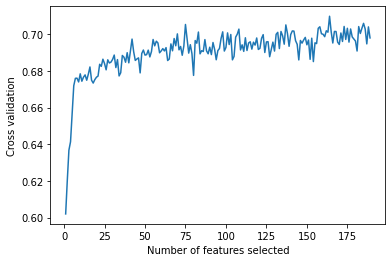

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt


rf_clf = RandomForestClassifier(bootstrap=True, 
                          criterion='gini',
                          max_depth=4, 
                          n_estimators=50, 
                          n_jobs=16,
                          random_state=1)

rfecv = RFECV(estimator=rf_clf, 
              step=1, 
              cv=3, 
              scoring='roc_auc')


rfe = rfecv.fit(x_train, y_train)
print(rfe.n_features_) 
print(rfe.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [51]:
res = list(zip (range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_))

nb_features = 25
rfe_sel= RFE(estimator=rf_clf,step=1,n_features_to_select=nb_features) 
rfe_sel_fit = rfe_sel.fit(x_train, y_train)

x_train_var = x_train[x_train.columns[rfe_sel_fit.get_support(indices=True)]]

# Display the columns names
x_train_var.columns

Index(['typei_card_qty', 'typec_card_qty', 'nr_seconds_seen_3h5h_bin',
       'telephone_num', 'max_call_sent_dur_bin', 'max_call_rec_dur_bin',
       'min_call_sent_dur_bin', 'min_call_rec_dur_bin',
       'nr_calls_sent_month_bin', 'mean_call_sent_dur_bin',
       'nr_calls_sent_distinct_numbers_bin', 'nr_distinct_cells_sent_bin',
       'nr_distinct_freguesia_sent_bin', 'nr_distinct_concelho_sent_bin',
       'nr_calls_rec_month_bin', 'nr_calls_rec_distinct_numbers_bin',
       'nr_distinct_cells_rec_bin', 'nr_distinct_freguesia_rec_bin',
       'Degree_1', 'geom_nuts_ii_dsc_Other', 'package_type_3P',
       'geom_distrito_dsc_new_LISBOA (DISTRITO)',
       'geom_nuts_iii_dsc_new_ALGARVE (NUTS III)',
       'geom_nuts_iii_dsc_new_GRANDE LISBOA',
       'geom_nuts_iii_dsc_new_GRANDE PORTO'],
      dtype='object')

### cut 70%/30%

189
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


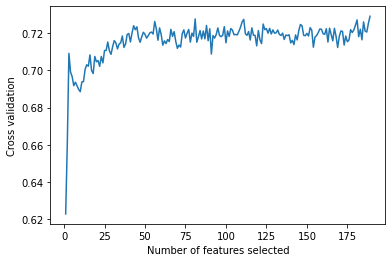

In [52]:
rf_clf = RandomForestClassifier(bootstrap=True, 
                          criterion='gini',
                          max_depth=4, 
                          n_estimators=50, 
                          n_jobs=16,
                          random_state=1)

rfecv = RFECV(estimator=rf_clf, 
              step=1, 
              cv=3, 
              scoring='roc_auc')


rfe = rfecv.fit(x_train2, y_train2)
print(rfe.n_features_) 
print(rfe.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [53]:
res = list(zip (range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_))

nb_features = 27
rfe_sel= RFE(estimator=rf_clf,step=1,n_features_to_select=nb_features) 
rfe_sel_fit = rfe_sel.fit(x_train2, y_train2)

x_train_var2 = x_train2[x_train2.columns[rfe_sel_fit.get_support(indices=True)]]

# Display the columns names
x_train_var2.columns

Index(['dsc_class_churn', 'typeh_card_qty', 'typei_card_qty', 'typec_card_qty',
       'premium_qty', 'premium_flg', 'nr_seconds_seen_3h5h_bin',
       'telephone_num', 'max_call_sent_dur_bin', 'min_call_rec_dur_bin',
       'nr_calls_sent_month_bin', 'nr_calls_sent_distinct_numbers_bin',
       'nr_distinct_cells_sent_bin', 'nr_distinct_freguesia_sent_bin',
       'nr_distinct_concelho_sent_bin', 'nr_calls_rec_month_bin',
       'nr_calls_rec_distinct_numbers_bin', 'nr_distinct_freguesia_rec_bin',
       'cost_recharge_bin', 'missings', 'package_type_3P',
       'geom_distrito_dsc_new_LISBOA (DISTRITO)',
       'geom_distrito_dsc_new_PORTO (DISTRITO)',
       'geom_municipio_dsc_new_LISBOA (MUNICIPIO)',
       'geom_municipio_dsc_new_Other', 'geom_nuts_iii_dsc_new_GRANDE LISBOA',
       'geom_nuts_iii_dsc_new_GRANDE PORTO'],
      dtype='object')

### cut 85%/15%

129
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 25  1 16  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 20 11  1  1  1  1 27  1  1  1  1  1  1  1  1  1  1  1
  1  1 14  1  1 39  1  1  1  1  1  1 42  1 29  1  1  1  1  1 58 57  1  1
  1  1  1  1  1  1  1  1 28  1  1 32  2  1 30  1  1  1  1  1  1 59  1  1
  1  1  1  3  1  1  1  5  8 48 13 47 17 10 22 19 60 23 56  1 34 61  9 26
 46 15  7  4  1  1 12 24  1  1  1 33 37 18  1 40  1  1 31  1  1 45  1  1
  1  1 36 38 35  1  1  1  1 21  6 41 43 44 49 50 51 52 53 54 55]


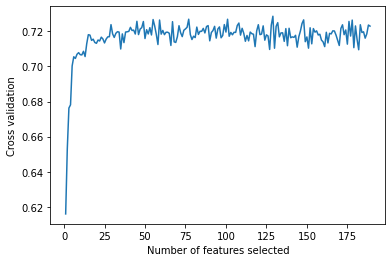

In [54]:
rf_clf = RandomForestClassifier(bootstrap=True, 
                          criterion='gini',
                          max_depth=4, 
                          n_estimators=50, 
                          n_jobs=16,
                          random_state=1)

rfecv = RFECV(estimator=rf_clf, 
              step=1, 
              cv=3, 
              scoring='roc_auc')


rfe = rfecv.fit(x_train3, y_train3)
print(rfe.n_features_) 
print(rfe.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [55]:
res = list(zip (range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_))

nb_features = 20
rfe_sel= RFE(estimator=rf_clf,step=1,n_features_to_select=nb_features) 
rfe_sel_fit = rfe_sel.fit(x_train3, y_train3)

x_train_var3 = x_train3[x_train3.columns[rfe_sel_fit.get_support(indices=True)]]

# Display the columns names
x_train_var3.columns

Index(['dsc_class_churn', 'typei_card_qty', 'typec_card_qty', 'telephone_num',
       'nr_calls_sent_month_bin', 'nr_calls_sent_distinct_numbers_bin',
       'nr_distinct_cells_sent_bin', 'nr_distinct_freguesia_sent_bin',
       'nr_distinct_concelho_sent_bin', 'nr_distinct_cells_rec_bin',
       'nr_distinct_freguesia_rec_bin', 'cost_recharge_bin',
       'premium_qty_change', 'missings', 'package_type_3P',
       'geom_distrito_dsc_new_LISBOA (DISTRITO)',
       'geom_municipio_dsc_new_LISBOA (MUNICIPIO)',
       'geom_nuts_iii_dsc_new_GRANDE LISBOA',
       'geom_nuts_iii_dsc_new_GRANDE PORTO', 'geom_nuts_iii_dsc_new_Other'],
      dtype='object')

## Decicion Tree

### cut 50%/50%

In [56]:
x_train_var.columns

Index(['typei_card_qty', 'typec_card_qty', 'nr_seconds_seen_3h5h_bin',
       'telephone_num', 'max_call_sent_dur_bin', 'max_call_rec_dur_bin',
       'min_call_sent_dur_bin', 'min_call_rec_dur_bin',
       'nr_calls_sent_month_bin', 'mean_call_sent_dur_bin',
       'nr_calls_sent_distinct_numbers_bin', 'nr_distinct_cells_sent_bin',
       'nr_distinct_freguesia_sent_bin', 'nr_distinct_concelho_sent_bin',
       'nr_calls_rec_month_bin', 'nr_calls_rec_distinct_numbers_bin',
       'nr_distinct_cells_rec_bin', 'nr_distinct_freguesia_rec_bin',
       'Degree_1', 'geom_nuts_ii_dsc_Other', 'package_type_3P',
       'geom_distrito_dsc_new_LISBOA (DISTRITO)',
       'geom_nuts_iii_dsc_new_ALGARVE (NUTS III)',
       'geom_nuts_iii_dsc_new_GRANDE LISBOA',
       'geom_nuts_iii_dsc_new_GRANDE PORTO'],
      dtype='object')

In [57]:
#are differents
(x_train['geom_distrito_dsc_new_LISBOA (DISTRITO)']+x_train['geom_municipio_dsc_new_LISBOA (MUNICIPIO)']).unique()

array([0., 2., 1.])

In [58]:
#are differents
(x_train['geom_distrito_dsc_new_LISBOA (DISTRITO)']+x_train['geom_nuts_iii_dsc_new_GRANDE LISBOA']).unique()

array([0., 2., 1.])

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0, class_weight={0:1,1:2})
parameters = {'max_depth':[2,3,4,5,6,7], 'ccp_alpha':[0,0.001,0.01],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(dt, parameters,cv=3)
clf.fit(x_train[x_train_var.columns],y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 2},
                                              random_state=0),
             param_grid={'ccp_alpha': [0, 0.001, 0.01],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7]})

In [60]:
clf.best_params_

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7}

In [61]:
dt=DecisionTreeClassifier(random_state=0, class_weight={0:1,1:2}, 
                          ccp_alpha= clf.best_params_['ccp_alpha'], 
                          criterion= clf.best_params_['criterion'], 
                          max_depth= clf.best_params_['max_depth'])
dt.fit(x_train[x_train_var.columns],y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 1, 1: 2}, max_depth=7,
                       random_state=0)

In [62]:
from sklearn.tree import plot_tree, export_text

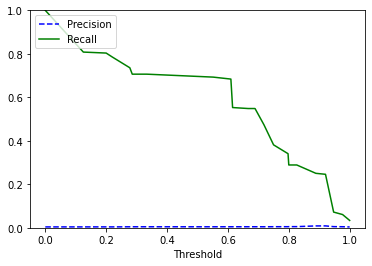

In [63]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

dt_prob = dt.predict_proba(x_test[x_train_var.columns])
# retrieve just the probabilities for the positive class
dt_prob1 = dt_prob[:, 1]

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

p, r, thresholds = precision_recall_curve(y_test, dt_prob1)
plot_precision_recall_vs_threshold(p,r,thresholds)

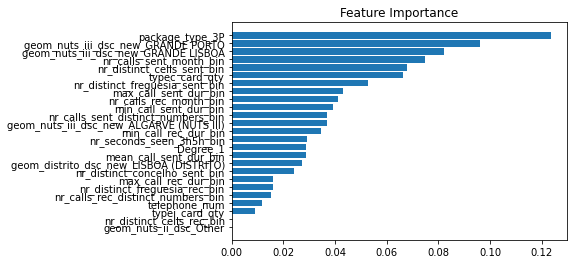

In [64]:
importances_dt = dt.feature_importances_

indices = np.argsort(importances_dt)
names = [x_train_var.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var.columns)), importances_dt[indices])
plt.yticks(range(len(x_train_var.columns)), names, rotation=0)
plt.show()

### cut 70%/30%

In [65]:
dt2=DecisionTreeClassifier(random_state=0,class_weight={0:1,1:2})
parameters = {'max_depth':[2,3,4,5,6,7], 'ccp_alpha':[0,0.001,0.01],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(dt2, parameters,cv=3)
clf.fit(x_train2[x_train_var2.columns],y_train2)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 2},
                                              random_state=0),
             param_grid={'ccp_alpha': [0, 0.001, 0.01],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7]})

In [66]:
clf.best_params_

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 6}

In [67]:
dt2=DecisionTreeClassifier(random_state=0,class_weight={0:1,1:2}, 
                          ccp_alpha= clf.best_params_['ccp_alpha'], 
                          criterion= clf.best_params_['criterion'], 
                          max_depth= clf.best_params_['max_depth'])
dt2.fit(x_train2[x_train_var2.columns],y_train2)

DecisionTreeClassifier(ccp_alpha=0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=6, random_state=0)

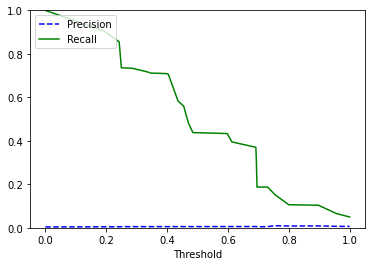

In [68]:
dt_prob2 = dt2.predict_proba(x_test[x_train_var2.columns])
# retrieve just the probabilities for the positive class
dt_prob12 = dt_prob2[:, 1]

p, r, thresholds = precision_recall_curve(y_test, dt_prob12)
plot_precision_recall_vs_threshold(p,r,thresholds)

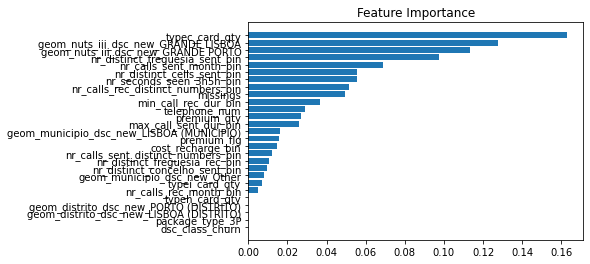

In [69]:
importances_dt2 = dt2.feature_importances_

indices = np.argsort(importances_dt2)
names = [x_train_var2.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var2.columns)), importances_dt2[indices])
plt.yticks(range(len(x_train_var2.columns)), names, rotation=0)
plt.show()

### cut 85%/15%

In [70]:
dt3=DecisionTreeClassifier(random_state=0,class_weight={0:1,1:4})
parameters = {'max_depth':[2,3,4,5,6,7], 'ccp_alpha':[0,0.001,0.01],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(dt3, parameters,cv=3)
clf.fit(x_train3[x_train_var3.columns],y_train3)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 4},
                                              random_state=0),
             param_grid={'ccp_alpha': [0, 0.001, 0.01],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7]})

In [71]:
clf.best_params_

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 5}

In [72]:
dt3=DecisionTreeClassifier(random_state=0, class_weight={0:1,1:4}, 
                          ccp_alpha= clf.best_params_['ccp_alpha'], 
                          criterion= clf.best_params_['criterion'], 
                          max_depth= clf.best_params_['max_depth'])
dt3.fit(x_train3[x_train_var3.columns],y_train3)

DecisionTreeClassifier(ccp_alpha=0, class_weight={0: 1, 1: 4},
                       criterion='entropy', max_depth=5, random_state=0)

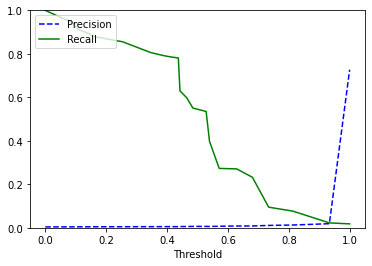

In [73]:
dt_prob3 = dt3.predict_proba(x_test[x_train_var3.columns])
# retrieve just the probabilities for the positive class
dt_prob13 = dt_prob3[:, 1]

p, r, thresholds = precision_recall_curve(y_test, dt_prob13)
plot_precision_recall_vs_threshold(p,r,thresholds)

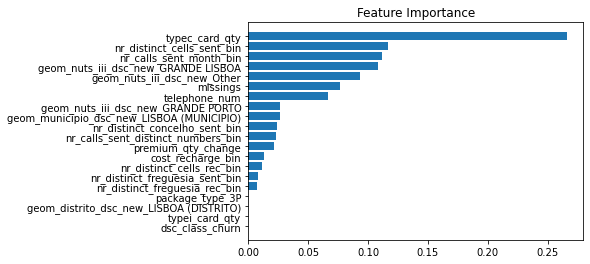

In [74]:
importances_dt3 = dt3.feature_importances_

indices = np.argsort(importances_dt3)
names = [x_train_var3.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var3.columns)), importances_dt3[indices])
plt.yticks(range(len(x_train_var3.columns)), names, rotation=0)
plt.show()

## Random Forest

### cut 50%/50%

In [75]:
rf_clf = RandomForestClassifier(bootstrap=True, 
                          random_state=0, class_weight={0:1,1:2})


parameters = {'n_estimators':range(20,81,10), 'max_depth':[2,3,4,5],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(rf_clf, parameters,cv=3)
clf.fit(x_train[x_train_var.columns],y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                              random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': range(20, 81, 10)})

In [76]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}

In [77]:
rf = RandomForestClassifier(bootstrap=True, 
                          random_state=0, class_weight={0:1,1:2},
                            criterion=clf.best_params_['criterion'], 
                            max_depth=clf.best_params_['max_depth'],
                            n_estimators=clf.best_params_['n_estimators'])


rf.fit(x_train[x_train_var.columns],y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=5, n_estimators=80,
                       random_state=0)

In [78]:
rf_prob = rf.predict_proba(x_test[x_train_var.columns])
# retrieve just the probabilities for the positive class
rf_prob1 = rf_prob[:, 1]

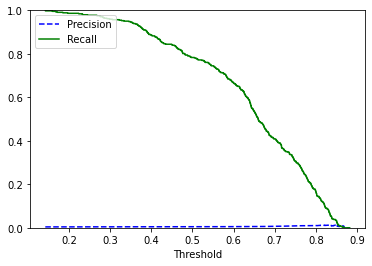

In [79]:
p, r, thresholds = precision_recall_curve(y_test, rf_prob1)
plot_precision_recall_vs_threshold(p,r,thresholds)

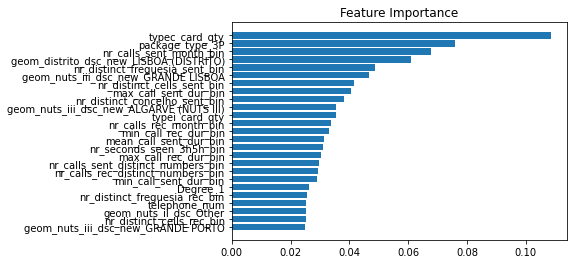

In [80]:
importances_rf = rf.feature_importances_

indices = np.argsort(importances_rf)
names = [x_train_var.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var.columns)), importances_rf[indices])
plt.yticks(range(len(x_train_var.columns)), names, rotation=0)
plt.show()

### cut 70%/30%

In [81]:
rf_clf2 = RandomForestClassifier(bootstrap=True, 
                          random_state=0, class_weight={0:1,1:2})


parameters = {'n_estimators':range(20,81,10), 'max_depth':[2,3,4,5],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(rf_clf2, parameters,cv=3)
clf.fit(x_train2[x_train_var2.columns],y_train2)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                              random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': range(20, 81, 10)})

In [82]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}

In [83]:
rf2 = RandomForestClassifier(bootstrap=True, 
                          random_state=0, class_weight={0:1,1:2},
                            criterion=clf.best_params_['criterion'], 
                            max_depth=clf.best_params_['max_depth'],
                            n_estimators=clf.best_params_['n_estimators'])


rf2.fit(x_train2[x_train_var2.columns],y_train2)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=5, n_estimators=30,
                       random_state=0)

In [84]:
rf_prob2 = rf2.predict_proba(x_test[x_train_var2.columns])
# retrieve just the probabilities for the positive class
rf_prob12 = rf_prob2[:, 1]

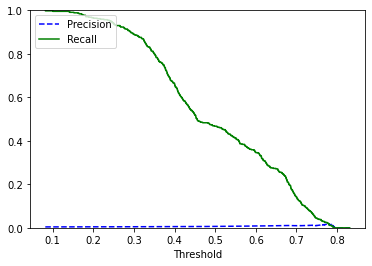

In [85]:
p, r, thresholds = precision_recall_curve(y_test, rf_prob12)
plot_precision_recall_vs_threshold(p,r,thresholds)

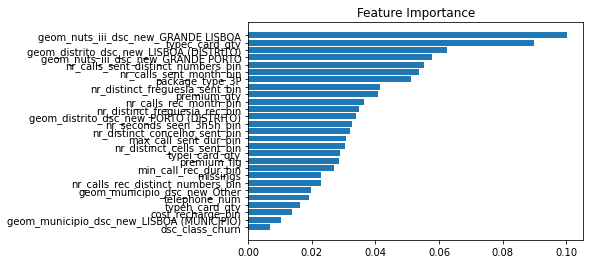

In [86]:
importances_rf2 = rf2.feature_importances_

indices = np.argsort(importances_rf2)
names = [x_train_var2.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var2.columns)), importances_rf2[indices])
plt.yticks(range(len(x_train_var2.columns)), names, rotation=0)
plt.show()

### cut 85%/15%

In [87]:
rf_clf3 = RandomForestClassifier(bootstrap=True, 
                          random_state=0, class_weight={0:1,1:1})


parameters = {'n_estimators':range(20,101,10), 'max_depth':[2,3,4,5,6],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(rf_clf3, parameters,cv=3)
clf.fit(x_train3[x_train_var3.columns],y_train3)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 1},
                                              random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': range(20, 101, 10)})

In [88]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [89]:
rf3 = RandomForestClassifier(bootstrap=True, 
                          random_state=0, class_weight={0:1,1:1},
                            criterion=clf.best_params_['criterion'], 
                            max_depth=clf.best_params_['max_depth'],
                            n_estimators=clf.best_params_['n_estimators'])


rf3.fit(x_train3[x_train_var3.columns],y_train3)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=5, random_state=0)

In [90]:
rf_prob3 = rf3.predict_proba(x_test[x_train_var3.columns])
# retrieve just the probabilities for the positive class
rf_prob13 = rf_prob3[:, 1]

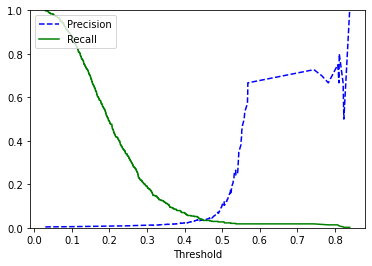

In [91]:
p, r, thresholds = precision_recall_curve(y_test, rf_prob13)
plot_precision_recall_vs_threshold(p,r,thresholds)

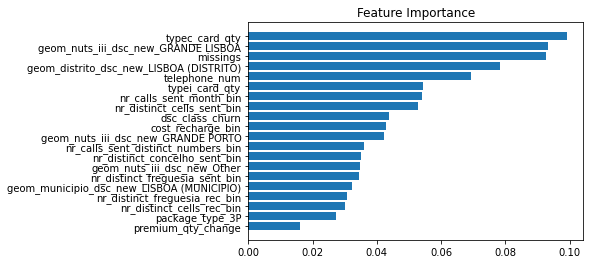

In [92]:
importances_rf3 = rf3.feature_importances_

indices = np.argsort(importances_rf3)
names = [x_train_var3.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var3.columns)), importances_rf3[indices])
plt.yticks(range(len(x_train_var3.columns)), names, rotation=0)
plt.show()

## CatBoost

### cut 85%/15%

In [108]:
cb_train=cla2.loc[cla2.month_id_original!=202008]
cb_test=cla2.loc[cla2.month_id_original==202008]

In [113]:
cb_train.loc[(cb_train.premium_qty.isnull()) | (cb_train.nr_devices.isnull()),'missings']=1
cb_train.missings=cb_train.missings.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [114]:
cb_test.loc[(cb_test.premium_qty.isnull()) | (cb_test.nr_devices.isnull()),'missings']=1
cb_test.missings=cb_test.missings.fillna(0)

In [115]:
cb_train15=pd.concat([cb_train.loc[cb_train.is_donor==0].sample(3000),cb_train.loc[cb_train.is_donor==1]],axis=0)

In [116]:
x_train_var3.columns

Index(['dsc_class_churn', 'typei_card_qty', 'typec_card_qty', 'telephone_num',
       'nr_calls_sent_month_bin', 'nr_calls_sent_distinct_numbers_bin',
       'nr_distinct_cells_sent_bin', 'nr_distinct_freguesia_sent_bin',
       'nr_distinct_concelho_sent_bin', 'nr_distinct_cells_rec_bin',
       'nr_distinct_freguesia_rec_bin', 'cost_recharge_bin',
       'premium_qty_change', 'missings', 'package_type_3P',
       'geom_distrito_dsc_new_LISBOA (DISTRITO)',
       'geom_municipio_dsc_new_LISBOA (MUNICIPIO)',
       'geom_nuts_iii_dsc_new_GRANDE LISBOA',
       'geom_nuts_iii_dsc_new_GRANDE PORTO', 'geom_nuts_iii_dsc_new_Other'],
      dtype='object')

In [119]:
x_cb15=cb_train15[['dsc_class_churn', 'typei_card_qty', 'typec_card_qty', 'telephone_num',
       'nr_calls_sent_month_bin', 'nr_calls_sent_distinct_numbers_bin',
       'nr_distinct_cells_sent_bin', 'nr_distinct_freguesia_sent_bin',
       'nr_distinct_concelho_sent_bin', 'nr_distinct_cells_rec_bin',
       'nr_distinct_freguesia_rec_bin', 'cost_recharge_bin',
       'premium_qty_change', 'missings', 'package_type',
       'geom_distrito_dsc',
       'geom_municipio_dsc',
       'geom_nuts_iii_dsc']]
y_cb15=cb_train15.is_donor

In [118]:
x_cb_test=cb_test[['dsc_class_churn', 'typei_card_qty', 'typec_card_qty', 'telephone_num',
       'nr_calls_sent_month_bin', 'nr_calls_sent_distinct_numbers_bin',
       'nr_distinct_cells_sent_bin', 'nr_distinct_freguesia_sent_bin',
       'nr_distinct_concelho_sent_bin', 'nr_distinct_cells_rec_bin',
       'nr_distinct_freguesia_rec_bin', 'cost_recharge_bin',
       'premium_qty_change', 'missings', 'package_type',
       'geom_distrito_dsc',
       'geom_municipio_dsc',
       'geom_nuts_iii_dsc']]
y_cb_test=cb_test.is_donor

In [120]:
from catboost import CatBoostClassifier, Pool, cv

cat_features=x_cb15.select_dtypes(include=['object']).columns

In [141]:
for col in cat_features:
    x_cb15[col]=x_cb15[col].fillna('Missing')
    x_cb_test[col]=x_cb_test[col].fillna('Missing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
cat_index=[]
for el in cat_features:
    cat_index.append(list(x_cb15.columns).index(el))

In [142]:
import numpy as np
cat_index=np.asarray(cat_index)

train_pool=Pool(x_cb15,y_cb15,cat_index)
test_pool=Pool(x_cb_test,y_cb_test,cat_index)

best_parm={'eval_metric':'Logloss', 'random_seed':0, 'logging_level':'Silent', 'use_best_model':True}

catb = CatBoostClassifier(**best_parm)

catb.fit(train_pool, eval_set=test_pool)

In [143]:
cb_prob3 = catb.predict_proba(x_cb_test)
# retrieve just the probabilities for the positive class
cb_prob13 = cb_prob3[:, 1]

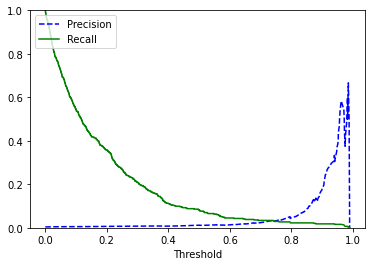

In [144]:
p, r, thresholds = precision_recall_curve(y_cb_test, cb_prob13)
plot_precision_recall_vs_threshold(p,r,thresholds)

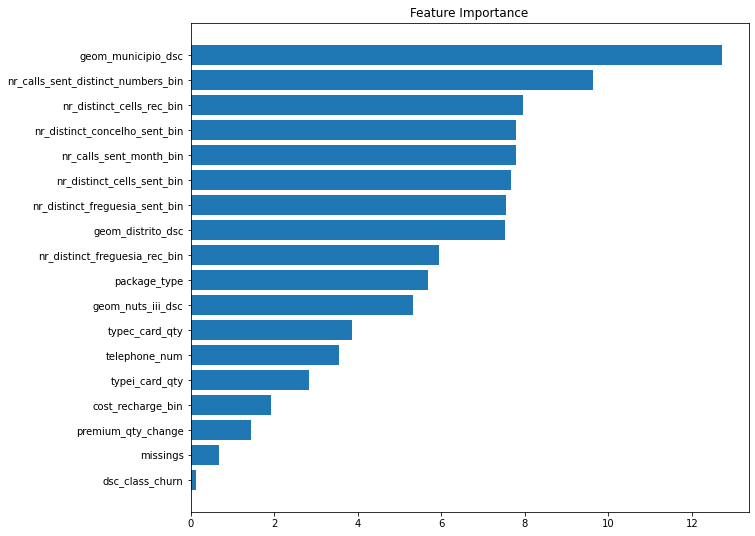

In [146]:
importances_cb3 = catb.feature_importances_

indices = np.argsort(importances_cb3)
names = [x_cb_test.columns[i] for i in indices]


plt.figure(figsize=(10, 9))
plt.title("Feature Importance")
plt.barh(range(len(x_cb_test.columns)), importances_cb3[indices])
plt.yticks(range(len(x_cb_test.columns)), names, rotation=0)
plt.show()

## ROCs

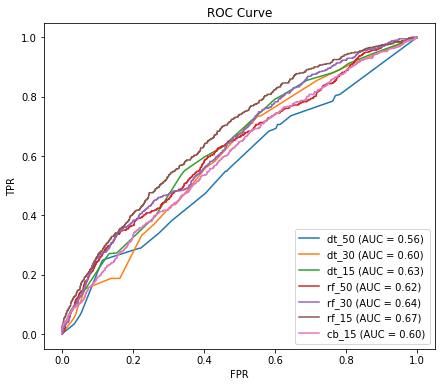

In [148]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 6))

# Decision Trees
fpr, tpr, _ = roc_curve(y_test, dt_prob1)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='dt_50 (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(y_test, dt_prob12)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='dt_30 (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(y_test, dt_prob13)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='dt_15 (AUC = %0.2f)' % auc_score)

# Random Forests
fpr, tpr, _ = roc_curve(y_test, rf_prob1)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='rf_50 (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(y_test, rf_prob12)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='rf_30 (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(y_test, rf_prob13)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='rf_15 (AUC = %0.2f)' % auc_score)

# Catboost
fpr, tpr, _ = roc_curve(y_test, cb_prob13)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, 
                 label='cb_15 (AUC = %0.2f)' % auc_score)


plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Business metric

In [149]:
x_test['prob_dt_50']=dt_prob1
x_test['prob_dt_30']=dt_prob12
x_test['prob_dt_15']=dt_prob13
x_test['prob_rf_50']=rf_prob1
x_test['prob_rf_30']=rf_prob12
x_test['prob_rf_15']=rf_prob13
x_test['prob_cb_15']=cb_prob13

In [150]:
teste=pd.concat([x_test,y_test],axis=1)

In [151]:
def max_calls(cut,models):
    metrics=[]
    for m in models:
        df=teste.sort_values(m).tail(cut)
        print('Presision of the model',m,'with cut',c,': ',round(df.is_donor.sum()/cut*100,2),'%')
        metrics.append(round(df.is_donor.sum()/cut*100,2))
    return(metrics)

In [155]:
models=['prob_dt_50','prob_dt_30','prob_dt_15',
       'prob_rf_50','prob_rf_30','prob_rf_15','prob_cb_15']

In [156]:
cuts=list(range(50,501,50))

In [157]:
cuts

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [158]:
matrix=[]
for c in cuts:
    matrix.append(max_calls(c,models))

Presision of the model prob_dt_50 with cut 50 :  0.0 %
Presision of the model prob_dt_30 with cut 50 :  0.0 %
Presision of the model prob_dt_15 with cut 50 :  16.0 %
Presision of the model prob_rf_50 with cut 50 :  0.0 %
Presision of the model prob_rf_30 with cut 50 :  0.0 %
Presision of the model prob_rf_15 with cut 50 :  18.0 %
Presision of the model prob_cb_15 with cut 50 :  16.0 %
Presision of the model prob_dt_50 with cut 100 :  0.0 %
Presision of the model prob_dt_30 with cut 100 :  0.0 %
Presision of the model prob_dt_15 with cut 100 :  8.0 %
Presision of the model prob_rf_50 with cut 100 :  0.0 %
Presision of the model prob_rf_30 with cut 100 :  0.0 %
Presision of the model prob_rf_15 with cut 100 :  12.0 %
Presision of the model prob_cb_15 with cut 100 :  10.0 %
Presision of the model prob_dt_50 with cut 150 :  0.0 %
Presision of the model prob_dt_30 with cut 150 :  0.0 %
Presision of the model prob_dt_15 with cut 150 :  5.33 %
Presision of the model prob_rf_50 with cut 150 : 

In [159]:
matrix

[[0.0, 0.0, 16.0, 0.0, 0.0, 18.0, 16.0],
 [0.0, 0.0, 8.0, 0.0, 0.0, 12.0, 10.0],
 [0.0, 0.0, 5.33, 0.67, 0.0, 8.0, 6.67],
 [0.0, 0.0, 4.0, 0.5, 0.5, 6.5, 5.0],
 [0.0, 0.0, 3.2, 0.8, 0.8, 5.2, 4.8],
 [0.0, 0.0, 2.67, 0.67, 1.33, 4.67, 4.0],
 [0.0, 0.0, 2.29, 0.86, 1.43, 4.29, 3.43],
 [0.0, 0.0, 2.0, 0.75, 1.25, 3.75, 3.25],
 [0.0, 0.0, 2.22, 0.67, 1.78, 3.56, 3.33],
 [0.0, 0.0, 2.0, 0.6, 1.8, 3.6, 3.0]]

In [160]:
business=pd.DataFrame(matrix,index=cuts,columns=models)

In [161]:
business

,prob_dt_50,prob_dt_30,prob_dt_15,prob_rf_50,prob_rf_30,prob_rf_15,prob_cb_15
50,0.0,0.0,16.00,0.00,0.00,18.00,16.00
100,0.0,0.0,8.00,0.00,0.00,12.00,10.00
150,0.0,0.0,5.33,0.67,0.00,8.00,6.67
200,0.0,0.0,4.00,0.50,0.50,6.50,5.00
250,0.0,0.0,3.20,0.80,0.80,5.20,4.80
300,0.0,0.0,2.67,0.67,1.33,4.67,4.00
350,0.0,0.0,2.29,0.86,1.43,4.29,3.43
400,0.0,0.0,2.00,0.75,1.25,3.75,3.25
450,0.0,0.0,2.22,0.67,1.78,3.56,3.33
500,0.0,0.0,2.00,0.60,1.80,3.60,3.00


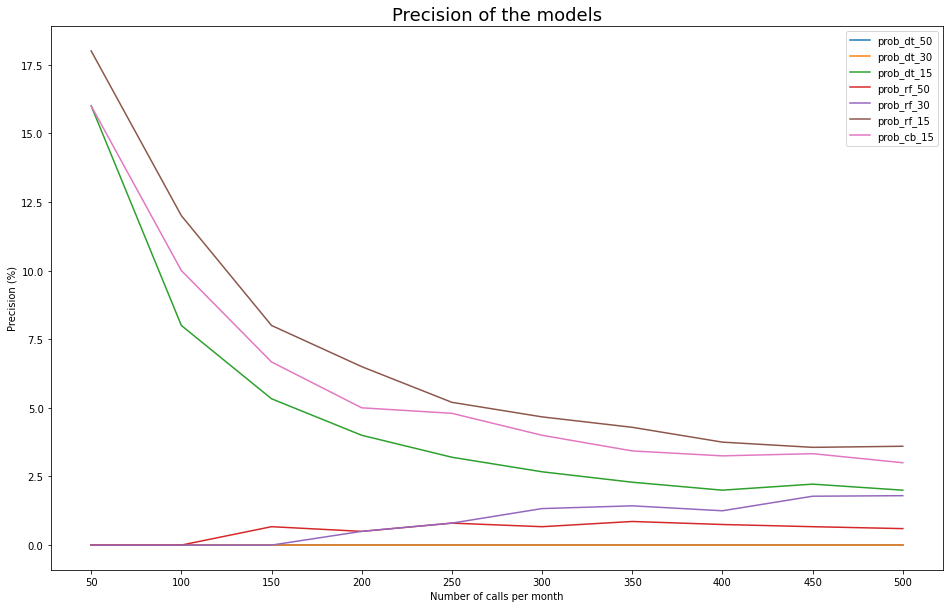

In [162]:
plt.figure(figsize=(16,10))
x=cuts
for col in business.columns:
    y=business[col]
    plt.plot(x,y,label=col)
plt.title('Precision of the models', fontsize=18)
plt.ylabel('Precision (%)')
plt.xlabel('Number of calls per month')
plt.xticks(cuts)
plt.legend()
plt.show()